<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [20]:
#Carga desde un archivo .xlsx sin indice
Barcelona= pd.read_csv("Barcelona(Cataluña).csv", encoding="latin1")

In [21]:
#Verificamos información del DataFrame
Barcelona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18927 entries, 0 to 18926
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  18927 non-null  object 
 1   source                                        18927 non-null  object 
 2   name                                          18927 non-null  object 
 3   description                                   18189 non-null  object 
 4   neighborhood_overview                         9154 non-null   object 
 5   host_id                                       18927 non-null  int64  
 6   host_name                                     18924 non-null  object 
 7   host_since                                    18924 non-null  object 
 8   host_location                                 14551 non-null  object 
 9   host_about                                    12152 non-null 

**Determinación de Clases para datos agrupados**


In [23]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [22]:
#Corroboramos valores nulos
valores_nulos=Barcelona.isnull().sum()
valores_nulos

last_scraped                                       0
source                                             0
name                                               0
description                                      738
neighborhood_overview                           9773
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               4998
Length: 72, dtype: int64

In [24]:
#Calculamos el numero total de la población "n"
Barcelona['accommodates']. info()
n=18927

<class 'pandas.core.series.Series'>
RangeIndex: 18927 entries, 0 to 18926
Series name: accommodates
Non-Null Count  Dtype
--------------  -----
18927 non-null  int64
dtypes: int64(1)
memory usage: 148.0 KB


In [25]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Barcelona['accommodates'].max()
Min=Barcelona['accommodates'].min()
Limites= [Min, Max]
Limites

[1, 16]

In [26]:
#Calculamos el rango R
R=Max-Min
R

15

In [27]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(26401)
ni

15.679779651994684

In [28]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

0.9566460966236725

**Creación de Categorias a partir de clases**

In [29]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(0.9, 16.1, 16)
intervalos

array([ 0.9       ,  1.91333333,  2.92666667,  3.94      ,  4.95333333,
        5.96666667,  6.98      ,  7.99333333,  9.00666667, 10.02      ,
       11.03333333, 12.04666667, 13.06      , 14.07333333, 15.08666667,
       16.1       ])

In [30]:
#Creamos las categorías 
categorias= ["Categoría1 (0-1.91 accommodates)", "Categoría2 (1.92-2.92 accommodates)","Categoría3 (2.93-3.94 accommodates)", "Categoría4 (3.95-4.95 accommodates)",
             "Categoría5 (4.96-5.96 accommodates)", "Categoría6 (5.97-6.98 accommodates)","Categoría7 (6.99-7.99 accommodates)", "Categoría8 (8-9 accommodates)", "Categoría9 (9.1-10 accommodates)", "Categoría10 (10.1-11 response)","Categoría11 (11.1-12 accommodates)", "Categoría12 (12.1-13 accommodates)",
             "Categoría13 (13.1-14 accommodates)", "Categoría14 (14.1-15 accommodates)","Categoría15 (15.1-16.1 accommodates)"
             ]

In [31]:
#Finalmente creamos las categorías en la columna numérica
Barcelona['accommodates']=pd.cut(x= Barcelona['accommodates'], bins=intervalos, labels= categorias)
Barcelona['accommodates']

0               Categoría8 (8-9 accommodates)
1         Categoría5 (4.96-5.96 accommodates)
2         Categoría6 (5.97-6.98 accommodates)
3         Categoría2 (1.92-2.92 accommodates)
4         Categoría3 (2.93-3.94 accommodates)
5         Categoría6 (5.97-6.98 accommodates)
6         Categoría4 (3.95-4.95 accommodates)
7         Categoría6 (5.97-6.98 accommodates)
8         Categoría3 (2.93-3.94 accommodates)
9         Categoría4 (3.95-4.95 accommodates)
10        Categoría2 (1.92-2.92 accommodates)
11        Categoría2 (1.92-2.92 accommodates)
12              Categoría8 (8-9 accommodates)
13           Categoría1 (0-1.91 accommodates)
14        Categoría4 (3.95-4.95 accommodates)
15        Categoría4 (3.95-4.95 accommodates)
16        Categoría6 (5.97-6.98 accommodates)
17        Categoría4 (3.95-4.95 accommodates)
18        Categoría6 (5.97-6.98 accommodates)
19        Categoría2 (1.92-2.92 accommodates)
20        Categoría6 (5.97-6.98 accommodates)
21        Categoría4 (3.95-4.95 ac

In [32]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Barcelona['accommodates'].value_counts().reset_index()
Tabla_freq

accommodates  count
0    Categoría2 (1.92-2.92 accommodates)   5872
1    Categoría4 (3.95-4.95 accommodates)   3778
2       Categoría1 (0-1.91 accommodates)   3172
3    Categoría3 (2.93-3.94 accommodates)   1736
4    Categoría6 (5.97-6.98 accommodates)   1645
5    Categoría5 (4.96-5.96 accommodates)   1436
6          Categoría8 (8-9 accommodates)    576
7    Categoría7 (6.99-7.99 accommodates)    316
8       Categoría9 (9.1-10 accommodates)    166
9   Categoría15 (15.1-16.1 accommodates)     87
10    Categoría11 (11.1-12 accommodates)     59
11    Categoría14 (14.1-15 accommodates)     27
12    Categoría13 (13.1-14 accommodates)     23
13        Categoría10 (10.1-11 response)     17
14    Categoría12 (12.1-13 accommodates)     17

In [33]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

accommodates  count
0    Categoría2 (1.92-2.92 accommodates)   5872
1    Categoría4 (3.95-4.95 accommodates)   3778
2       Categoría1 (0-1.91 accommodates)   3172
3    Categoría3 (2.93-3.94 accommodates)   1736
4    Categoría6 (5.97-6.98 accommodates)   1645
5    Categoría5 (4.96-5.96 accommodates)   1436
6          Categoría8 (8-9 accommodates)    576
7    Categoría7 (6.99-7.99 accommodates)    316
8       Categoría9 (9.1-10 accommodates)    166
9   Categoría15 (15.1-16.1 accommodates)     87
10    Categoría11 (11.1-12 accommodates)     59
11    Categoría14 (14.1-15 accommodates)     27
12    Categoría13 (13.1-14 accommodates)     23
13        Categoría10 (10.1-11 response)     17
14    Categoría12 (12.1-13 accommodates)     17

In [34]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('accommodates')
Filtro_index

count
accommodates                               
Categoría2 (1.92-2.92 accommodates)    5872
Categoría4 (3.95-4.95 accommodates)    3778
Categoría1 (0-1.91 accommodates)       3172
Categoría3 (2.93-3.94 accommodates)    1736
Categoría6 (5.97-6.98 accommodates)    1645
Categoría5 (4.96-5.96 accommodates)    1436
Categoría8 (8-9 accommodates)           576
Categoría7 (6.99-7.99 accommodates)     316
Categoría9 (9.1-10 accommodates)        166
Categoría15 (15.1-16.1 accommodates)     87
Categoría11 (11.1-12 accommodates)       59
Categoría14 (14.1-15 accommodates)       27
Categoría13 (13.1-14 accommodates)       23
Categoría10 (10.1-11 response)           17
Categoría12 (12.1-13 accommodates)       17

Text(0, 0.5, 'Frecuencia')

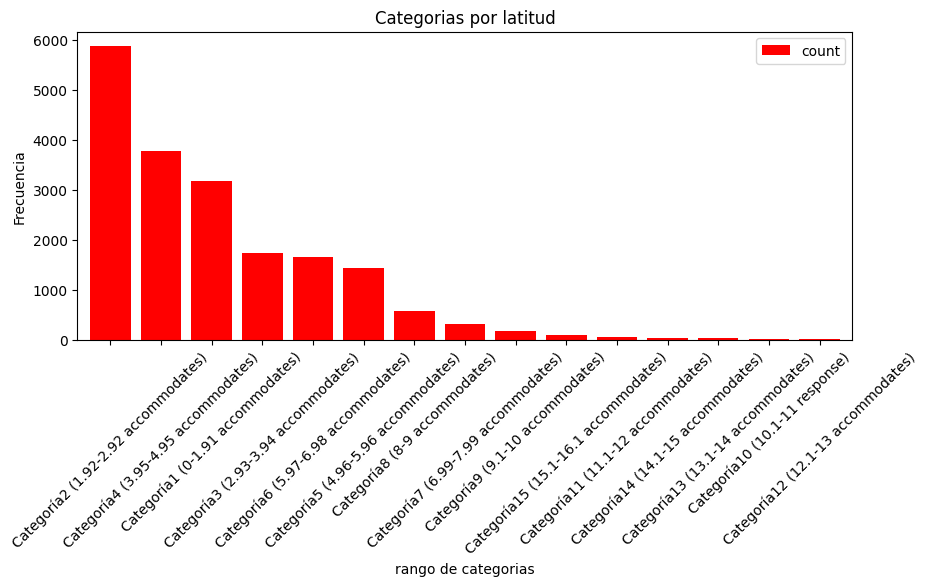

In [35]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')